# STAT 345: Nonparametric Statistics

## Lesson 10.1: $2\times 2$ Contingency Tables

**Reading: Conover Section 4.1**

*Prof. John T. Whelan*

Thursday 10 April 2025

These lecture slides are in a computational notebook.  You have access to them through http://vmware.rit.edu/

Flat HTML and slideshow versions are also in MyCourses.

The notebook can run Python commands (other notebooks can use R or Julia; "Ju-Pyt-R").  Think: computational data analysis, not "coding".

Standard commands to activate inline interface and import libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0,5.0)
plt.rcParams['font.size'] = 14

## $2\times 2$ Contingency Tables

You saw on the last homework that there were slightly different (exact) null
distributions for the chi-squared statistic from a two-way contingency
table, depending on whether we assumed the row totals were fixed or only
the total number of observations.

We want to explore this in a little
more detail, so we look at the simple case where $r=2=c$. In that case,
the contingency table looks like this:

|       |     $$j=1$$   |   $$j=2$$  | Total |
|  ------- |----------| ----------| -------|
|    $$i=1$$ | $$O_{11}$$ |  $$O_{12}$$ | $$r_1$$ |
|    $$i=2$$ | $$O_{21}$$ |  $$O_{22}$$ | $$r_2$$ |
|   Total   |      $$c_1$$   |   $$c_2$$ |   $$N$$ |

The exact probability distributions depend on the details of the
experimental setup, in particular which quantities (the row and column
totals, just the row totals, or just the total number of observations)
are assumed to be held fixed in hypothetical repetitions of the
experiment.

### Fisher’s Exact Test

Most restrictive set of assumptions: $\{r_i\}$ &
$\{c_j\}$ are known in advance, and only the
$\{{\color{royalblue}{O_{ij}}}\}$ are random.

This means that everything
is actually determined by one random variable, say
${\color{royalblue}{O_{11}}}$, and then we can find
- ${\color{royalblue}{O_{12}}}=r_1-{\color{royalblue}{O_{11}}}$
- ${\color{royalblue}{O_{21}}}=c_1-{\color{royalblue}{O_{11}}}$
- ${\color{royalblue}{O_{22}}} = r_2 - {\color{royalblue}{O_{21}}} = N - r_1 - c_1 + {\color{royalblue}{O_{11}}}$

Null probability distribution for ${\color{royalblue}{O_{11}}}$ is a
hypergeometric distribution, since we are choosing $r_1$ objects out of
$N$, where $c_1$ of the $N$ are of a certain type, and finding that
$O_{11}$ out of the $r_1$ are of the type we chose.

Recall: hypergeometric distribution, from sampling
without replacement. <br> Consider a hand w/seven cards: three
of them hearts and four spades: $\heartsuit$234 $\spadesuit$2345

Suppose we draw four cards, at random, without replacement. What is the
probability that we will end up with one heart and three spades?

There
are
$\binom{7}{4} = \frac{7!}{4!3!} = \frac{7\times 6\times 5}{3\times 2\times 1}
  = 35$ possible sets of four cards we can draw out of the seven
available.

How many of those include one heart and three spades? There
are $\binom{3}{1} = \frac{3!}{1!2!} = 3$ possibilities for the heart
and $\binom{4}{3} = \frac{4!}{3!1!} = 4$ possibilities for which three
spades we have, so there are $3\times
4=12$ different four-card sets with one heart and three spades.

So the
probability of getting exactly one heart in a four card set when there
are three hearts available out of seven cards to choose from is
$\binom{3}{1}\binom{4}{3}\big/\binom{7}{4} = \frac{12}{35}
  \approx 0.3429$

So the
probability of getting exactly one heart in a four card set when there
are three hearts available out of seven cards to choose from is
$\binom{3}{1}\binom{4}{3}\big/\binom{7}{4} = \frac{12}{35}
  \approx 0.3429$

In [3]:
from scipy.special import comb as nchoosek
12/35, nchoosek(3,1)*nchoosek(4,3)/nchoosek(7,4)

(0.34285714285714286, 0.34285714285714286)

In [4]:
stats.hypergeom(7,3,4).pmf(1), stats.hypergeom(7,4,3).pmf(1)

(0.3428571428571428, 0.3428571428571428)

Returning to the contingency table, the probability of getting $O_{11}$
of the $r_1$ observations in row 1 to be in column 1, when we know that
$c_1$ of the total $N$ observations will be in column 1 is
$$\frac{\binom{c_1}{O_{11}}\binom{N-c_1}{r_1-O_{11}}}{\binom{N}{r_1}}
=\frac{\binom{c_1}{O_{11}}\binom{c_2}{O_{12}}}{\binom{N}{r_1}}
  =\frac{c_1!c_2!r_1!r_2!}{N!O_{11}!O_{21}!O_{12}!O_{22}!}$$

Note the symmetry!

If we know
that the row and column totals are fixed in an experimental design,
“Fisher’s exact test” says to compare the one degree of freedom in the
table, say $O_{11}$, against the appropriate hypergeometric
distribution. Suppose for example we have the following contingency
table

| | $$j=1$$ | $$j=2$$ | Total |
| -- | -- | -- | -- |
| $$i=1$$ |  $$1$$ |  $$6$$ | $$7$$ |
| $$i=2$$ | $$8$$ |  $$2$$ | $$10$$ |
| **Total** |  $$9$$ |  $$8$$ | $$17$$ |

In [5]:
O_ij = np.array([[1,6],[8,2]])
r_i = np.sum(O_ij,axis=-1); c_j = np.sum(O_ij,axis=0); N=np.sum(O_ij); r_i, c_j, N

(array([ 7, 10]), array([9, 8]), 17)

In [6]:
O11 = O_ij[0,0]; r1 = r_i[0]; c1 = c_j[0]; O11, r1, c1

(1, 7, 9)

For $p$-value, depends if we're doing a one-sided or two-sided test.  One-sided $p=P(\color{royalblue}{O_{11}}\le 1)\approx 0.013$

In [7]:
pfish1=stats.hypergeom(N,c1,r1).cdf(O11); pfish1

0.013368983957219251

For two-sided, have to ask which $O_{11}$ values are "at least as extreme" as 1:

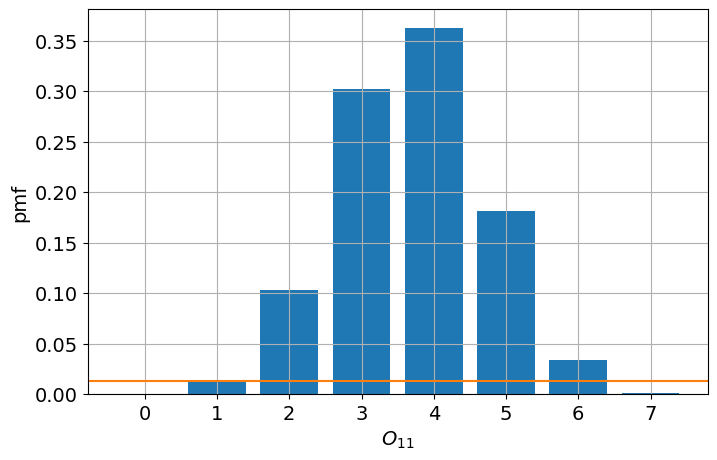

In [9]:
x_x = np.arange(max(0,r1+c1-N),min(r1,c1)+1); px_x = stats.hypergeom(N,c1,r1).pmf(x_x);plt.axhline(px_x[1],color='C1');
plt.bar(x_x,px_x);plt.xlabel(r'$O_{11}$');plt.ylabel('pmf');plt.grid()

In [10]:
pxobs = stats.hypergeom(N,c1,r1).pmf(O11); pfish2=np.sum(px_x[px_x<=pxobs]); x_x[px_x<=pxobs], pfish2

(array([0, 1, 7]), 0.015220074043603454)

For large $N$, can apply normal approx to the hypergeometric
distribution using the mean and variance

$$  E({\color{royalblue}{O_{11}}}) = \frac{r_1c_1}{N} \qquad\hbox{and}\qquad
    \operatorname{Var}({\color{royalblue}{O_{11}}}) = \frac{N-r_1}{N-1}r_1\frac{c_1}{N}\frac{N-c_1}{N}
    = \frac{r_1r_2c_1c_2}{N^2(N-1)}$$

and so the test statistic
$$\color{royalblue}{T} = \sqrt{\frac{N-1}{r_1r_2c_1c_2}} (N{\color{royalblue}{O_{11}}}-r_1c_1)$$
should be approximately standard normal.

This looks pretty asymmetric,
but if we write $$\begin{split}
    N{\color{royalblue}{O_{11}}}-r_1c_1 &= ({\color{royalblue}{O_{11}}}+{\color{royalblue}{O_{12}}}+{\color{royalblue}{O_{21}}}+{\color{royalblue}{O_{22}}}){\color{royalblue}{O_{11}}}
    - ({\color{royalblue}{O_{11}}}+{\color{royalblue}{O_{12}}})({\color{royalblue}{O_{11}}}+{\color{royalblue}{O_{21}}})
    \\
    &= {\color{royalblue}{O_{11}}}{\color{royalblue}{O_{22}}} - {\color{royalblue}{O_{12}}}{\color{royalblue}{O_{21}}}
  \end{split}$$ we get the more symmetrical form
$$\label{e:fisher-largeN}
  \color{royalblue}{T} = \sqrt{\frac{N-1}{r_1r_2c_1c_2}} ({\color{royalblue}{O_{11}}}{\color{royalblue}{O_{22}}} - {\color{royalblue}{O_{12}}}{\color{royalblue}{O_{21}}})$$

Fisher's exact test comes from the “lady tasting tea” experiment.

A lady claimed
to be able to tell by taste whether milk or tea has been poured first into a cup.  Fisher tested this by preparing four cups by each method, presenting the 8 cups in a random order, and asking her to determine which four were poured tea-first.

She got them all right, for a contingency table of

<table>
    <tr><td></td><td></td><th colspan="2">Lady</th><td></td></tr>
    <tr><td></td><td></td><th>Tea First</th><th>Milk First</th><th>Total</th></tr>
    <tr><th rowspan="2">Fisher</th><th>Tea First</th><td>4</td><td>0</td><td>4</td></tr>
    <tr><th>Milk First</th><td>0</td><td>4</td><td>4</td></tr>
    <tr><th colspan="2">Total</th><td>4</td><td>4</td><td>8</td></tr>
</table>

There was only one way to do this, out of $\binom{8}{4}=\frac{8\times 7\times 6\times 5}{4\times 3\times 2\times 1}=70$ possibilities, for a $p$-value of $\frac{1}{70}\approx 0.014$

In [11]:
nchoosek(8,4), 1/70, stats.hypergeom(8,4,4).pmf(4)

(70.0, 0.014285714285714285, 0.014285714285714284)

### Test for Equal Proportions

The assumption that the row and column totals are both fixed makes for a
somewhat artificial experimental setup. The "lady tasting tea" setup did indeed guarantee that the row
totals (number of cups prepared tea-first and number milk-first) as well
as the column totals (number of cups identified as tea-first and number
identified as milk-first) were fixed (all to $4$ in this case). But if
he had not told her how many were prepared each way, but asked her to
identify each cup as tea-first or milk-first as it came, the row totals
would have been fixed, but not the column totals.

If the row totals are known but not the column totals, there are only
two constraints, and thus two (independent) random variables
${\color{royalblue}{O_{11}}}\sim\operatorname{Bin}(r_1,p^{(1)}_1)$ and
${\color{royalblue}{O_{21}}}\sim\operatorname{Bin}(r_2,p^{(2)}_1)$. The
null hypothesis says that $p^{(1)}_1=p^{(2)}_1=p_{\bullet 1}$, but
doesn’t specify the value of $p_{\bullet 1}$. The joint null pmf for
${\color{royalblue}{O_{11}}}$ and ${\color{royalblue}{O_{21}}}$ is
$$\begin{split}
    p(O_{11},O_{21}|H_0)
    = \binom{r_1}{O_{11}}p_{\bullet 1}^{O_{11}}(1-p_{\bullet 1})^{r_1-O_{11}}
    \binom{r_2}{O_{21}}p_{\bullet 1}^{O_{21}}(1-p_{\bullet 1})^{r_2-O_{21}}
    = \frac{r_1!r_2!}{O_{11}!O_{12}!O_{21}!O_{22}!}
    (p_{\bullet 1})^{c_1} (p_{\bullet 2})^{c_2}
  \end{split}$$

The null distribution depends on the unknown $p_{\bullet 1}$; The $p$-value is for the worst-case scenario (maximum)

| | $$j=1$$ | $$j=2$$ | Total |
| -- | -- | -- | -- |
| $$i=1$$ |  $$1$$ |  $$6$$ | $$7$$ |
| $$i=2$$ | $$8$$ |  $$2$$ | $$10$$ |
| **Total** |  $$9$$ |  $$8$$ | $$17$$ |

Returning to this example, what is the $p$-value with only $r_1=7$ and $r_2=10$ fixed?  Use the statistic
$(N{\color{royalblue}{O_{11}}}-r_1\color{royalblue}{C_1})/\sqrt{\color{royalblue}{C_1}\color{royalblue}{C_2}}$; everything depends on $\color{royalblue}{O_{11}}$ & $\color{royalblue}{O_{21}}$

In [12]:
r2 = r_i[1]; c2 = c_j[1]; O11_x = np.arange(r1+1);O21_y = np.arange(r2+1); O11_x,O21_y

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]))

In [13]:
c1_xy = O11_x[:,None] + O21_y[None,:]; c2_xy = N - c1_xy
stat_xy = np.round((N*O11_x[:,None]-r1*c1_xy)/np.sqrt(c1_xy*c2_xy+1e-12),8)
mystat = np.round((N*O11-r1*c1)/np.sqrt(c1*c2+1e-12),8); mystat

-5.42115199

In [14]:
np.sum(stat_xy<=-np.abs(mystat)), np.sum(stat_xy>=np.abs(mystat))

(9, 9)

$(r_1+1)(r_2+1)=88$ possible values, but null probabilities depend on $p_{\bullet 1}$.

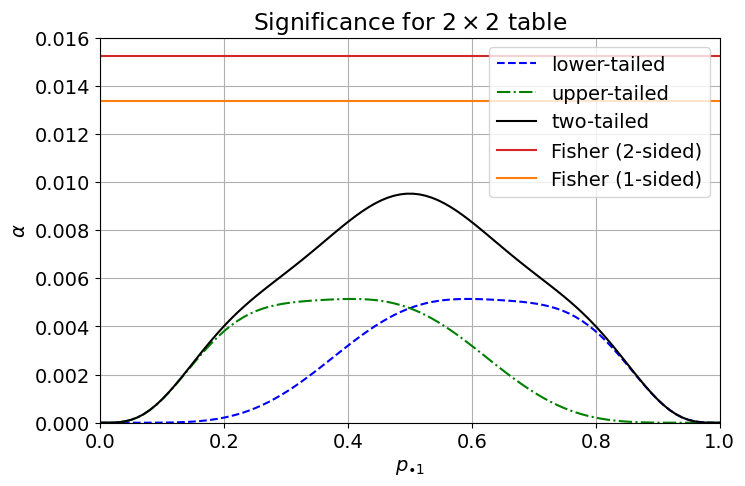

In [15]:
p1_p = np.linspace(0,1,100)
pmf_xyp = stats.binom(r1,p1_p[None,None,:]).pmf(O11_x[:,None,None])*stats.binom(r2,p1_p[None,None,:]).pmf(O21_y[None,:,None])
plower_p = np.sum((stat_xy<=mystat)[:,:,None]*pmf_xyp,axis=(0,1));
pupper_p = np.sum((stat_xy>=-mystat)[:,:,None]*pmf_xyp,axis=(0,1))
plt.  plot(p1_p,plower_p,'b--',label='lower-tailed');plt.plot(p1_p,pupper_p,'g-.',label='upper-tailed');
plt.plot(p1_p,plower_p+pupper_p,'k-',label='two-tailed');plt.xlabel(r'$p_{\bullet 1}$');
plt.axhline(pfish2,color='C3',label='Fisher (2-sided)');plt.axhline(pfish1,color='C1',label='Fisher (1-sided)');plt.grid();
plt.ylabel(r'$\alpha$');plt.title(r'Significance for $2\times 2$ table');plt.legend();plt.xlim(0,1);plt.ylim(0,0.016);

We see that, if the column totals are not actually fixed, Fisher’s exact
test has overestimated the $p$-value.

We see that, if the column totals are not actually fixed, Fisher’s exact
test has overestimated the $p$-value.

In [16]:
max(plower_p), pfish1, max(plower_p+pupper_p), pfish2

(0.005143504468716187,
 0.013368983957219251,
 0.009517998341610323,
 0.015220074043603454)

For large sample sizes, we can also apply a normal approximation,
assuming that the two random variables ${\color{royalblue}{O_{11}}}$ and
${\color{royalblue}{O_{21}}}$ are independent and approximately normal
with the means and variances given by the binomial distribution:
$$\begin{gathered}
    E({\color{royalblue}{O_{11}}}) = r_1 p^{(1)}_{1}
    \qquad\hbox{and}\qquad
    E({\color{royalblue}{O_{21}}}) = r_2 p^{(2)}_{1}
    \\
    \operatorname{Var}({\color{royalblue}{O_{11}}}) = r_1 p^{(1)}_{1}(1-p^{(1)}_{1})
    \qquad\hbox{and}\qquad
    \operatorname{Var}({\color{royalblue}{O_{21}}}) = r_2 p^{(2)}_{1}(1-p^{(2)}_{1})
  \end{gathered}$$
To test the null hypothesis that
$p^{(1)}_{1}=p^{(2)}_{1}=p_{\bullet 1}$, we should use the test
statistic
${\color{royalblue}{O_{11}}}/r_1-{\color{royalblue}{O_{21}}}/r_2$.
Assuming $H_0$, this has
$$E\left(\frac{{\color{royalblue}{O_{11}}}}{r_1}-\frac{{\color{royalblue}{O_{21}}}}{r_2}\right)
  =0\qquad\hbox{and}\qquad\operatorname{Var}\left(\frac{{\color{royalblue}{O_{11}}}}{r_1}-\frac{{\color{royalblue}{O_{21}}}}{r_2}\right)
  =\left(\frac{1}{r_1}+\frac{1}{r_2}\right)p_{\bullet 1}(1-p_{\bullet 1})$$

We can replace the unknown $p_{\bullet 1}$ with its estimate
$${\color{royalblue}{\hat{p}_{\bullet 1}}}
  =\frac{{\color{royalblue}{O_{11}}}+{\color{royalblue}{O_{21}}}}{r_1+r_2} = \frac{{\color{royalblue}{C_1}}}{N}\qquad\hbox{so}\qquad 1 - {\color{royalblue}{\hat{p}_{\bullet 1}}}
  =1 - \frac{{\color{royalblue}{O_{11}}}+{\color{royalblue}{O_{21}}}}{r_1+r_2} = \frac{{\color{royalblue}{C_2}}}{N}$$
We then assume that the standardized statistic
$${\color{royalblue}{T_1}}
  =\frac{{\color{royalblue}{O_{11}}}/r_1-{\color{royalblue}{O_{21}}}/r_2}
  {
    \sqrt{
      \left(\frac{1}{r_1}+\frac{1}{r_2}\right)
      \frac{{\color{royalblue}{C_1}}}{N}\frac{{\color{royalblue}{C_2}}}{N}
    }
  }$$ is approximately standard normal. We can simplify the statistic as
$$\label{e:2x2-largeN}
  \begin{split}
    {\color{royalblue}{T_1}}
    &=
    \frac{r_2{\color{royalblue}{O_{11}}}-r_1{\color{royalblue}{O_{21}}}}
    {
      \sqrt{
        r_1r_2(r_2+r_1)
        \frac{{\color{royalblue}{C_1}}}{N}\frac{{\color{royalblue}{C_2}}}{N}
      }
    }
    =
    \frac{
      ({\color{royalblue}{O_{21}}}+{\color{royalblue}{O_{22}}}){\color{royalblue}{O_{11}}}
      -({\color{royalblue}{O_{11}}}+{\color{royalblue}{O_{12}}}){\color{royalblue}{O_{21}}}}
    {
      \sqrt{
        r_1r_2(r_2+r_1)
        \frac{{\color{royalblue}{C_1}}}{N}\frac{{\color{royalblue}{C_2}}}{N}
      }
    }
    \\
    &=
    \sqrt{\frac{N}{r_1r_2{\color{royalblue}{C_1}}{\color{royalblue}{C_2}}}}
    \,
    ({\color{royalblue}{O_{11}}}{\color{royalblue}{O_{22}}}-{\color{royalblue}{O_{12}}}{\color{royalblue}{O_{21}}})
  \end{split}$$ Note that this is $\sqrt{\frac{N}{N-1}}$ times the
large-sample normal approximation to the test statistic in Fisher’s
exact test, . As you’ll show on the homework, the square of
${\color{royalblue}{T_1}}$ appearing in is the standard chi-squared
statistic for a two-way contingency table. (This makes sense, since the
square of a standard normal random variable is a $\chi^2(1)$ random
variable.)